coding a one-anova in python

Line 1 was used to import pandas: a library used for statistical analyses. The label "pd" is a shortcut for typing. 

In [1]:
import pandas as pd

Line 19 was used to import the data set (Data2) that was created in rstudio and named "Bacteria": the data set includes the type of disinfectants used and the amount of colonies that were counted on each plate. The "delim_whitespace=True" indicated that any whitespace is used to create each/new columns. 

In [19]:
Bacteria = pd.read_csv("data2", delim_whitespace=True)

Line 20 was used to "print" the data set "Bacteria" to show the data that the system was able to produce with the code given. 

In [20]:
print(Bacteria)

   Disinfectant  Colony
0         Lysol       3
1         Lysol       4
2         Lysol       6
3        Clorox      18
4        Clorox       0
5        Clorox       6
6        Bleach     148
7        Bleach     111
8        Bleach     108
9        Meyers     400
10       Meyers     700
11       Meyers      58
12       Method      52
13       Method       7
14       Method      22
15           IA    5000
16           IA    5000
17           IA    5000


Line 21 imported a statistical analysis library called "statsmodels" and a shortcute was created called "sm"

In [21]:
import statsmodels as sm

Line 22 was used to import statsmodels.formula.api which would give access to specific analytical tests and the shortcut "smf" was created. Will be used to run the ANOVA.

In [22]:
import statsmodels.formula.api as smf

Line 23 was used to import stats from scipy: a library for statistical analysis. Will be used to perform the tukey test.

In [23]:
from scipy import stats

line 25 was used to run the one ANOVA using information from statsmodels and the data set "Bacteria". The ANOVA was ran using a linear model and then printed to see the results of the test that was ran. 

In [25]:
ANOVA = smf.ols('Colony~Disinfectant', data=Bacteria)
ANOVAlm = ANOVA.fit()
print(ANOVAlm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Colony   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     691.6
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.50e-14
Time:                        16:24:21   Log-Likelihood:                -109.76
No. Observations:                  18   AIC:                             231.5
Df Residuals:                      12   BIC:                             236.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                122

/Users/alissacoberly/miniconda3/envs/python/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Line 43 was used to import pyplot with the shortcut "plt" from matplotlib. This would give the ability to run a visual analysis; Boxplot. 

In [43]:
from matplotlib import pyplot as plt

Line 45 was used to run the boxplot with disinfectants being on the x-axis and colony counts on the y-axis. 

<AxesSubplot: title={'center': 'Colony'}, xlabel='Disinfectant'>

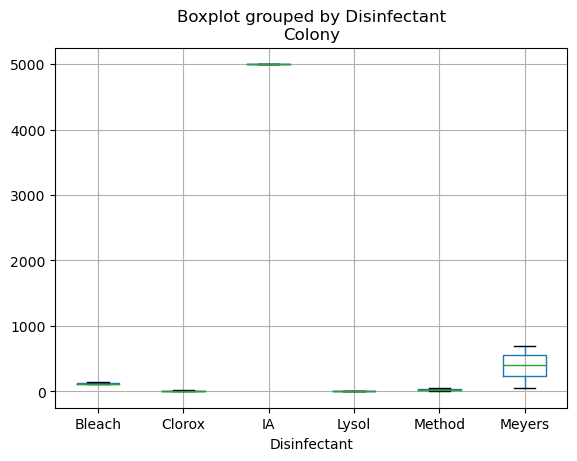

In [45]:
Bacteria.boxplot(column="Colony", by="Disinfectant")

Lines 85-91 were used to group each of the disinfectants with the three different colony counts (per disinfectant). This is important for the tukey test.

In [85]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="Lysol"]

0    3
1    4
2    6
Name: Colony, dtype: int64

In [87]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="Clorox"]

3    18
4     0
5     6
Name: Colony, dtype: int64

In [88]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="Bleach"]

6    148
7    111
8    108
Name: Colony, dtype: int64

In [89]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="Meyers"]

9     400
10    700
11     58
Name: Colony, dtype: int64

In [90]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="Method"]

12    52
13     7
14    22
Name: Colony, dtype: int64

In [91]:
Bacteria["Colony"][Bacteria["Disinfectant"]=="IA"]

15    5000
16    5000
17    5000
Name: Colony, dtype: int64

Line 91 was used to import the function "pairwise_tukeyhsd" from statsmodels. This was used to code for the tukey test. 

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Line 93 was used to run the tukey test. 

In [93]:
tukey = pairwise_tukeyhsd(endog=Bacteria['Colony'],
                          groups=Bacteria['Disinfectant'],
                          alpha=0.05)

Line 94 was used to print the results from the tukey test. The data presented in the tukey test reveals that IA was the least effective disinfectant compared to the other disinfectants. The "reject" column indicates whether or not the data was rejected by the null hypothesis. True data means that the data was rejected in that it is out of range of the p-value (0.05). 

In [94]:
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
Bleach Clorox  -114.3333 0.8871  -475.9194   247.2527  False
Bleach     IA  4877.6667    0.0  4516.0806  5239.2527   True
Bleach  Lysol     -118.0 0.8738   -479.586    243.586  False
Bleach Method   -95.3333 0.9429  -456.9194   266.2527  False
Bleach Meyers   263.6667  0.214   -97.9194   625.2527  False
Clorox     IA     4992.0    0.0   4630.414   5353.586   True
Clorox  Lysol    -3.6667    1.0  -365.2527   357.9194  False
Clorox Method       19.0    1.0   -342.586    380.586  False
Clorox Meyers      378.0 0.0387     16.414    739.586   True
    IA  Lysol -4995.6667    0.0 -5357.2527 -4634.0806   True
    IA Method    -4973.0    0.0  -5334.586  -4611.414   True
    IA Meyers    -4614.0    0.0  -4975.586  -4252.414   True
 Lysol Method    22.6667 0.9999  -338.9194   384.2527  False
 Lysol Meyers   381.6667